# Analyzing A Network of Synaptic Interactions [100 Points]

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp

## Part I

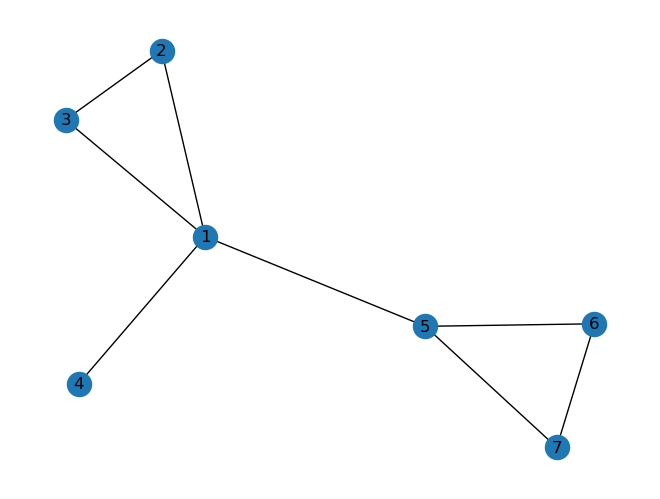

In [4]:
G1_1 = nx.Graph()
G1_1.add_edge(6, 7)
G1_1.add_edge(6, 5)
G1_1.add_edge(7, 5)
G1_1.add_edge(7, 6)
G1_1.add_edge(5, 6)
G1_1.add_edge(5, 6)
G1_1.add_edge(5, 1)
G1_1.add_edge(1, 2)
G1_1.add_edge(1, 3)
G1_1.add_edge(1, 4)
G1_1.add_edge(2, 1)
G1_1.add_edge(2, 3)
G1_1.add_edge(3, 2)
G1_1.add_edge(3, 1)

draw(G1_1)

In [5]:
import networkx.algorithms.community as nx_comm

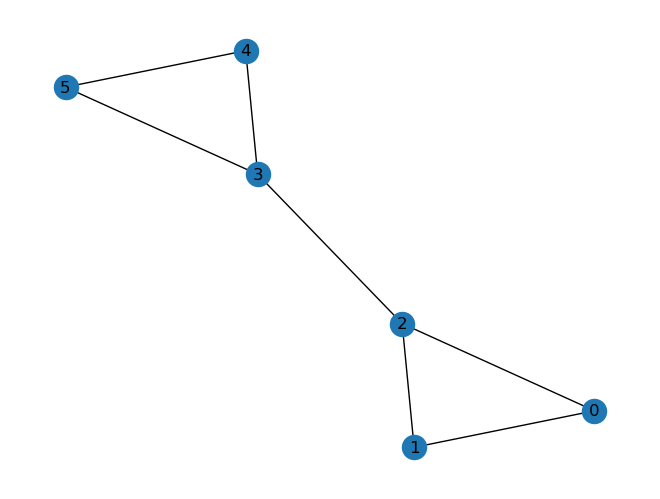

In [9]:
G = nx.barbell_graph(3, 0)
draw(G)

In [10]:
nx_comm.modularity(G1_1, communities=[{1,2,3,4}, {5,6,7}])

0.3671875

In [11]:
nx_comm.modularity(G1_1, nx_comm.label_propagation_communities(G1_1))

0.3671875

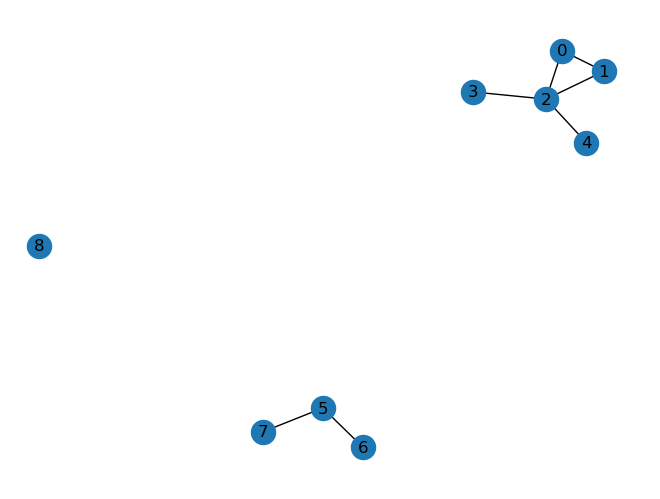

In [2]:
#Part I-1
#Implement your code and show the visualization

def draw(G, ax=None, with_labels=True, *args, **kwargs):
    return nx.draw(G, with_labels=with_labels, pos=nx.spring_layout(G, seed=42), ax=ax, *args, **kwargs)

G1_1 = nx.Graph()
G1_1.add_edge(0, 1)
G1_1.add_edge(0, 2)
G1_1.add_edge(1, 2)
G1_1.add_edge(2, 3)
G1_1.add_edge(2, 4)
G1_1.add_edge(5, 6)
G1_1.add_edge(5, 7)
G1_1.add_node(8)

draw(G1_1)

In [5]:
#Part I-2.a
#Implement your code and write the answer in the Markdown cell right below

G1_2 = nx.read_graphml("Assignment1_Part1-2_cities_data.graphml")
list(G1_2.nodes(data=True))[:10]

[('Youngstown, OH', {}),
 ('Yankton, SD', {}),
 ('Yakima, WA', {}),
 ('Worcester, MA', {}),
 ('Wisconsin Dells, WI', {}),
 ('Winston-Salem, NC', {}),
 ('Winnipeg, MB', {}),
 ('Winchester, VA', {}),
 ('Wilmington, NC', {}),
 ('Wilmington, DE', {})]

In [6]:
list(G1_2.edges(data=True))[:10]

[('Youngstown, OH', 'Yankton, SD', {'weight': 966}),
 ('Youngstown, OH', 'Yakima, WA', {'weight': 2410}),
 ('Youngstown, OH', 'Worcester, MA', {'weight': 604}),
 ('Youngstown, OH', 'Wisconsin Dells, WI', {'weight': 595}),
 ('Youngstown, OH', 'Winston-Salem, NC', {'weight': 494}),
 ('Youngstown, OH', 'Winnipeg, MB', {'weight': 1279}),
 ('Youngstown, OH', 'Winchester, VA', {'weight': 250}),
 ('Youngstown, OH', 'Wilmington, NC', {'weight': 637}),
 ('Youngstown, OH', 'Wilmington, DE', {'weight': 345}),
 ('Youngstown, OH', 'Williston, ND', {'weight': 1481})]

**Nodes represent cities and in the US, edges indicate a trip between them, and the weight of the edges indicate the distance in miles between the two cities**

Type your answer for Part I-2.a here

In [8]:
print(f"There are {G1_2.number_of_nodes()} nodes and {G1_2.number_of_edges()} edges")

There are 128 nodes and 8128 edges


In [9]:
subgraph = nx.subgraph_view(G1_2, filter_edge=lambda source,target: G1_2[source][target]['weight']<50)
filtered_city_pairs = list(subgraph.edges())
print(f"There are {len(filtered_city_pairs)} city pairs with a weight between them less than 50. They are:")
filtered_city_pairs

There are 8 city pairs with a weight between them less than 50. They are:


[('Youngstown, OH', 'Ravenna, OH'),
 ('Wheeling, WV', 'Steubenville, OH'),
 ('Wausau, WI', 'Stevens Point, WI'),
 ('Tacoma, WA', 'Seattle, WA'),
 ('Stroudsburg, PA', 'Scranton, PA'),
 ('Stockton, CA', 'Sacramento, CA'),
 ('South Bend, IN', 'Saint Joseph, MI'),
 ('San Jose, CA', 'San Francisco, CA')]

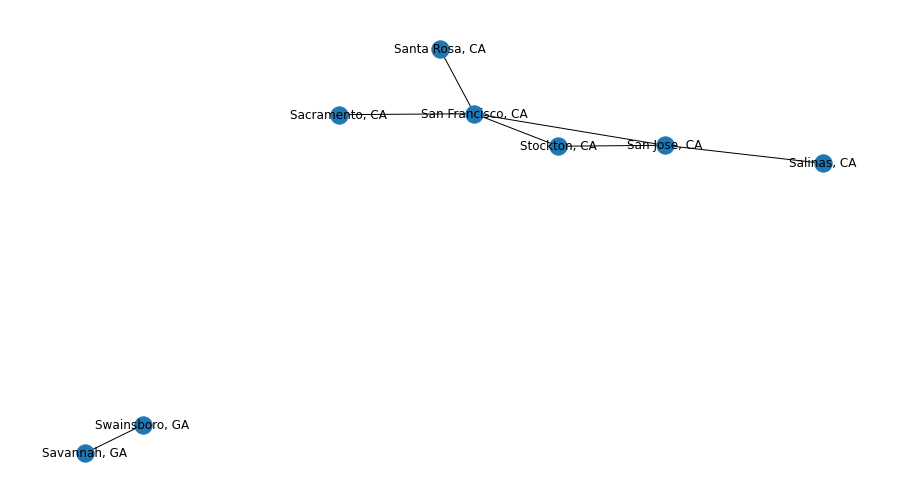

In [11]:
#Part I-2.b
#Implement your code and show the visualization of Question 4

def cities_within_100(G, city_list):
    '''
    Input
    G: graph
    city_list: list of strings (names of cities in G)

    Output
    S: subgraph of G that only contains edges between\
    cities in “city_list” and directly neighboring \
    cities that are less than 100 miles away
    '''
    S = nx.subgraph_view(G, filter_edge=lambda src,trgt: \
                         (src in city_list or trgt in city_list) \
                         and (G[src][trgt]['weight']<100))
    # We need to unfreeze that graph to be able to modify it
    S = nx.Graph(S)
    # Then we delete nodes without any edges
    isolated_nodes = set(nx.isolates(S))
    S.remove_nodes_from(isolated_nodes)
    return S

G1_2b = cities_within_100(G1_2, ["Savannah, GA", "Santa Rosa, CA", "San Francisco, CA", "San Jose, CA"])
fig, ax = plt.subplots(figsize=(16, 9))
draw(G1_2b, ax=ax)

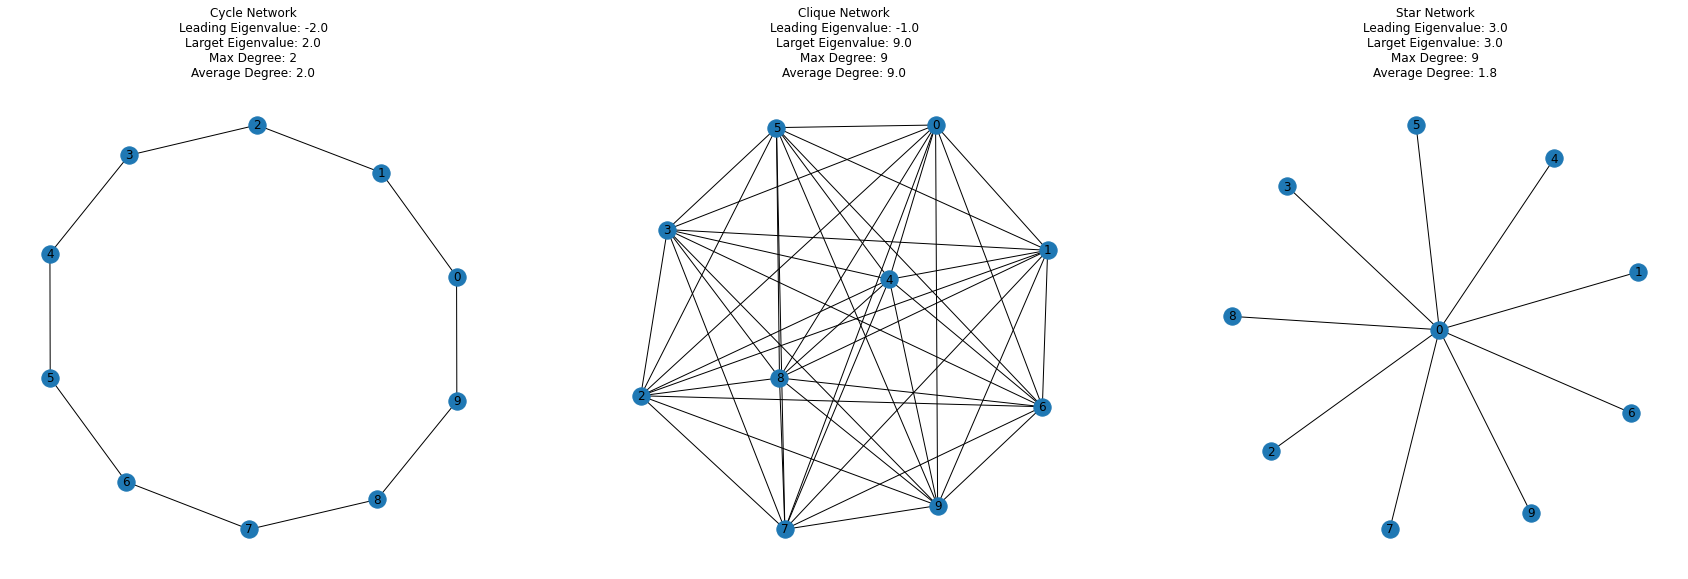

In [22]:
#Part I-3
#Implement your code and write the answer in the Markdown cell right below

def leading_eigenvalue(G):
    matrix = nx.to_numpy_matrix(G)
    eig = np.linalg.eig(matrix)[0]    
    return eig[0], max(eig)

def degree_stats(G):
    degrees = dict(G.degree).values()
    max_deg = max(degrees)
    avg_deg = np.mean(list(degrees))
    return max_deg, avg_deg

cycle = nx.cycle_graph(10)
clique = nx.complete_graph(10)
star = nx.star_graph(np.arange(10))

fig, axs = plt.subplots(ncols=3, figsize=(30, 9))
draw(cycle, axs[0])
draw(clique, axs[1])
draw(star, axs[2])

def info_title(G, title):
    lead_eig, max_eig = leading_eigenvalue(G)
    max_deg, avg_deg = degree_stats(G)
    return f"{title} Network\nLeading Eigenvalue: {round(lead_eig, 2)}\nLarget Eigenvalue: {round(max_eig, 2)}\nMax Degree: {max_deg}\nAverage Degree: {round(avg_deg, 2)}"

axs[0].set_title(info_title(cycle, "Cycle"))
axs[1].set_title(info_title(clique, "Clique"))
axs[2].set_title(info_title(star, "Star"));

Type your answer for Part I-3 here
_______________________________________________________________________________

**For the Cycle and Clique networks of the undirectected graph the largest eigenvalues and the maximum or average degree of each network are the same. However, the Star network shows a difference in the largest eigenvalue and the maximum or average degree. For a Star network the largest eigenvalue is square root of (N-1)**

## PART II

True


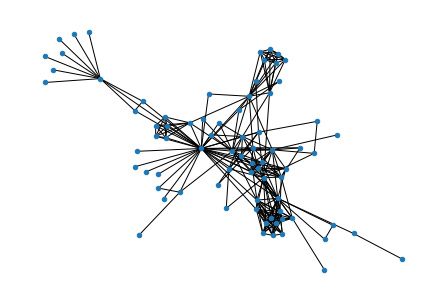

In [25]:
#Part II-1
#Implement your code here and write the answer in the Markdown cell right below
G2 = nx.read_gml("Assignment1_Part2_lesmis_data.gml")


print(nx.is_connected(G2))
draw(G2, node_size=20, with_labels=False)

Type your answer for Part II-1 here
__________________________________

**The undirected gragh is connected**

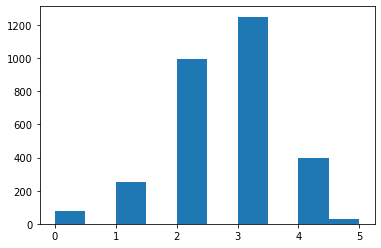

In [26]:
#Part II-2
#Implement your code and plot your distribution

def shortest_path_lens_distribution(G, weight=None):
    lens = []
    nodes = list(G.nodes()) # we convert it to list to be indexable
    for i, source in enumerate(nodes):
        for j in range(i, len(nodes)):
            target = nodes[j]
            lens.append(nx.shortest_path_length(G, source ,target, weight=weight))
    return plt.hist(lens)

shortest_path_lens_distribution(G2);

In [27]:
#Part II-3
#Implement your code here and write the answer in the Markdown cell right below

adjacency_df = nx.to_pandas_adjacency(G2, dtype=int, weight='value')
adjacency_df.index.name = "Source"
adjacency_df.columns.name = "Target"
transition_mtrx = adjacency_df.apply(lambda row: row/row.sum(), axis='columns')
transition_mtrx

Target,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,...,MotherPlutarch,Gueulemer,Babet,Claquesous,Montparnasse,Toussaint,Child1,Child2,Brujon,MmeHucheloup
Source,,,,,,,,,,,,,,,,,,,,,
Myriel,0.000000,0.032258,0.258065,0.322581,0.032258,0.032258,0.032258,0.032258,0.064516,0.032258,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Napoleon,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
MlleBaptistine,0.470588,0.000000,0.000000,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
MmeMagloire,0.526316,0.000000,0.315789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
CountessDeLo,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toussaint,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Child1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.6,0.0,0.0
Child2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.6,0.0,0.0,0.0


In [28]:
# we initially meet Valjean
init_dist = np.zeros(len(transition_mtrx))
init_dist[list(transition_mtrx.columns).index("Valjean")] = 1
init_dist

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
for _ in range(50):
    update = init_dist @ transition_mtrx
    init_dist = update

sorted_characters = init_dist.sort_values(ascending=False)
sorted_characters

Target
Valjean         0.096453
Marius          0.063390
Enjolras        0.055377
Courfeyrac      0.051103
Cosette         0.041490
                  ...   
Isabeau         0.000611
Scaufflaire     0.000611
Boulatruelle    0.000610
MlleVaubois     0.000610
Jondrette       0.000608
Length: 77, dtype: float64

Type your answer for Part II-3 here
_______________________________________________________________________________

**The top three characters are:**
* Valjean
* Marius
* Enjolras 

## Part III

In [31]:
#Load the graph
G3 = nx.read_graphml("Assignment1_Part3_drosophila_medulla_data.graphml")

In [32]:
#Part III-1
#Implement your code and write the answer in the Markdown cell right below
wcc = sorted(nx.weakly_connected_components(G3), key=len, reverse=True)
largest_wcc_size = len(wcc[0])
largest_wcc_size/G3.number_of_nodes()

0.9938236945536215

Type your answer for Part III-1 here
__________________________________

**The percentage of weakly connected components is 99.38%**

In [33]:
#Part III-2
#Implement your code and write the answer in the Markdown cell right below
scc = sorted(nx.strongly_connected_components(G3), key=len, reverse=True)
largest_scc_size = len(scc[0])
largest_scc_size/G3.number_of_nodes()

0.4407636159460977

Type your answer for Part III-2 here
_______________________________________________________________________________
**The percentage of weakly connected components is 44.08%**

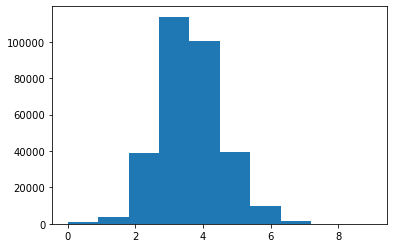

In [38]:
#Part III-3
#Implement your code and show the distribution

scc_subgraph = nx.subgraph_view(G3, filter_node=lambda x: x in scc[0])
shortest_path_lens_distribution(scc_subgraph);

## PART IV

In [39]:
#Part IV-1 
G4 = nx.Graph()
with open("Assignment1_Part4_github_data.txt", "r") as f:
    for line in f:
        user_id, project_id = line.split()
        # we add prefixes to avoid name conflicts
        G4.add_node(f"U_{user_id}", bipartite="Users")
        G4.add_node(f"P_{project_id}", bipartite="Projects")
        G4.add_edge(f"U_{user_id}", f"P_{project_id}")

In [42]:
# Check that there are no edges between nodes of the same type
for s, t in G4.edges:
    assert s[0] != t[0]

# ensure that the graph is bipartite
nx.is_bipartite(G4)

True

In [49]:
user_nodes = {n for n, d in G4.nodes(data=True) if d["bipartite"] == "Users"}
project_nodes = set(G4) - user_nodes

user_nodes = list(user_nodes)
project_nodes = list(project_nodes)

In [51]:
adj_matrix = nx.algorithms.bipartite.biadjacency_matrix(G4, row_order=user_nodes)
assert adj_matrix.shape == (len(user_nodes), len(project_nodes))

In [52]:
# Project Projection
p_proj = adj_matrix.T @ adj_matrix
assert p_proj.shape[0] == len(project_nodes)

for i in range(len(project_nodes)): # we set the diagonal to zero to avoid edges from a node to itself
    p_proj[i, i] = 0

In [54]:
# User Projection
u_proj = adj_matrix @ adj_matrix.T
assert u_proj.shape[0] == len(user_nodes)

for i in range(len(user_nodes)): # we set the diagonal to zero to avoid edges from a node to itself
    u_proj[i, i] = 0

In [55]:
#Part IV-1: to find most similar users/projects, we check the degree centrality
u_idx = np.unravel_index(np.argmax(u_proj, axis=None), u_proj.shape)
u_idx

(52568, 27861)

Type your answer for Part IV-1 here
_______________________________________________________________________________
People with most number of shared memberships:

In [56]:
print(f"{user_nodes[u_idx[0]]} and {user_nodes[u_idx[1]]} share the most projects on Github with a total of {u_proj[u_idx]}")

U_655 and U_325 share the most projects on Github with a total of 270


In [57]:
#Part IV-2 (Continue)
#Implement your code and write the answer in the Markdown cell right below
p_idx = np.unravel_index(np.argmax(p_proj, axis=None), p_proj.shape)
p_idx

(92286, 60762)

Type your answer for Part IV-1 here

People with most number of shared memberships:

In [58]:
print(f"{project_nodes[p_idx[0]]} and {project_nodes[p_idx[1]]} share the most projects on Github with a total of {p_proj[p_idx]}")

P_17 and P_299 share the most projects on Github with a total of 954


## PART V

In [59]:
#Part V-1
#Implement your code and write the answer in the Markdown cell right below

G5 = nx.DiGraph()
with open("Assignment1_Part5_language_data.txt") as f:
    for line in f:
        u, v = line.split()
        G5.add_edge(u, v)

nx.is_directed_acyclic_graph(G5)

False

Type your answer for Part V-1 here
_______________________________________________________________________________

**The graph is NOT DAG**


In [60]:
#Part V-2
#Implement your code 

edges_to_remove = set()
for c in nx.simple_cycles(G5):
    edge = sorted([(c[i], c[i+1]) for i in range(len(c)-1)])[0]
    edges_to_remove.add(edge)

DAG = G5.copy()
DAG.remove_edges_from(edges_to_remove)

In [61]:
#Part V-3
#Implement your code and write the answer in the Markdown cell right below

source_languages = nx.voterank(DAG)

Type your answer for Part V-3 here
_______________________________________________________________________________


In [62]:
print(f"There are {len(source_languages)} \"source\" languages.")
print(f"The source language of {source_languages[0]} had the highest influence.")

There are 135 "source" languages.
The source language of haskell had the highest influence.
